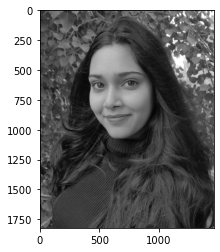

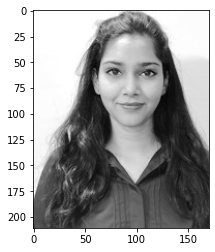

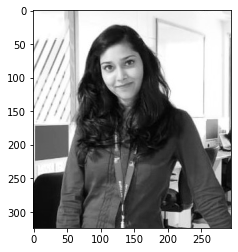

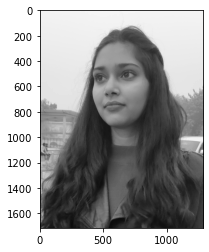

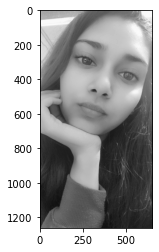

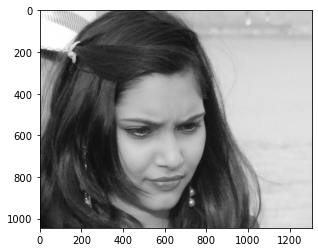

[[249 247 244 ... 203 202 202]
 [250 248 245 ... 203 202 202]
 [250 249 246 ... 202 203 203]
 ...
 [ 17  17  17 ... 215 217 217]
 [ 17  17  18 ... 216 217 217]
 [ 17  17  17 ... 217 217 217]]
(1044, 1306)


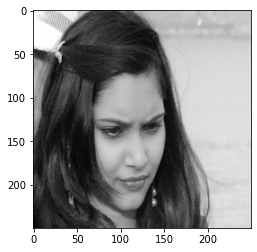

6
0
0
0
1
1
1
1
1
0
0
1
0
Epoch 1/8
1/1 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6667
Epoch 2/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.5000
Epoch 4/8
1/1 [==============================] - 0s 3ms/step - loss: 1.8825 - accuracy: 0.6667
Epoch 5/8
1/1 [==============================] - 0s 2ms/step - loss: 2.4979 - accuracy: 0.6667
Epoch 6/8
1/1 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.8333
Epoch 7/8
1/1 [==============================] - 0s 3ms/step - loss: 2.5883e-04 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - 0s 3ms/step - loss: 8.5981e-05 - accuracy: 1.0000


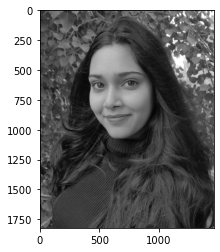

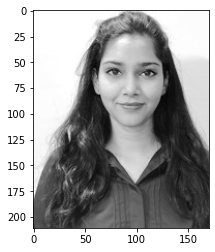

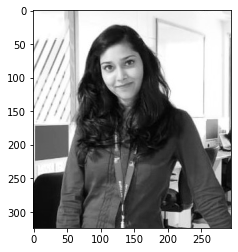

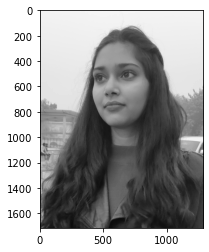

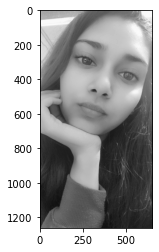

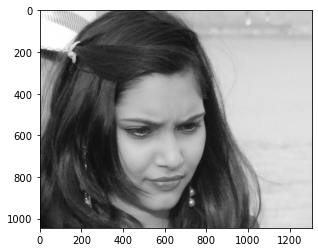

[1.0000000e+00 1.0000000e+00 1.1312962e-03 2.3368001e-04 1.0000000e+00
 7.6945752e-02]
not happy
not happy
happy
happy
not happy
happy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


DATADIR = "MyImages"
CATEGORIES = ["happy", "not_happy"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()


print(img_array)

print(img_array.shape)


IMG_SIZE = 250

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
          try:
             img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
             new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
             training_data.append([new_array, class_num])
          except Exception as e:
            pass

create_training_data()



print(len(training_data))



for sample in training_data:
  print(sample[1])



import random

random.shuffle(training_data)

 

for sample in training_data:
  print(sample[1])



X = []        #features
Y = []        #labels

for features,label in training_data:
    X.append(features)
    Y.append(label)
  
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

X=np.array(X/255.0)
Y=np.array(Y)



X[1]



model = Sequential()
model.add(Conv2D(16,(3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




model.fit(X, Y, epochs=8)

images = np.vstack([X])
val = model.predict(images)
val = val.reshape(-1,)

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()
  


print(val)
for i in val:
    if i > 0.5:
        print("not happy")
    else: 
        print("happy")